
#### Project - Chronic Kidney Disease Prediction

### Problem Statement


To classify patients as having chronic kidney disease or not using Artificial neural networks (ANN).

## <div id="toc">Table of Contents</div>
<ol>
<li><a href="#ImportLibraries" style="text-decoration:none">Import And Install Packages</a></li>
<li><a href="#LoadDataset" style="text-decoration:none">Load Dataset</a></li>
<li><a href="#EDA" style="text-decoration:none">Exploratory Data Analysis (EDA)</a></li>
</ol>

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

#### <div id="ImportLibraries">1. Installing and Importing the required packages <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

In [2]:
!pip install keras
!pip install tensorflow

#importing libraries
import glob
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

#### <div id="LoadDataset">2. Load Dataset <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

In [4]:
#loading the data
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

#printing first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### <div id="EDA">3. Exploratory Data Analysis (EDA) <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

Epoch 1/2000
1/1 [==============================] - 1s 743ms/step - loss: 0.6951 - accuracy: 0.5022
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6875 - accuracy: 0.4672
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6801 - accuracy: 0.8646
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6729 - accuracy: 0.8777
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6659 - accuracy: 0.8690
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.8559
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.8515
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.8515
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6390 - accuracy: 0.8472
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6326 - accuracy: 0.8472
Epoch 11/20

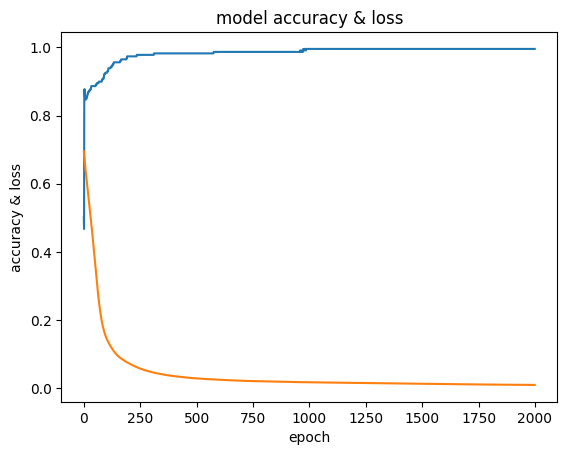

In [5]:
#getting the shape of the data
df.shape

#creating a list of column names to keep
column_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

#dropping the columns that are not in column_to_retain
df = df.drop( [col for col in df.columns if not col in column_to_retain], axis = 1 )

#dropping the rows with na or missing values
df = df.dropna(axis=0)

#transformingthe non numeric data in columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

#printing the first 5 rown in new cleaned datasets
df.head()

#split the data into independent (X) data set (the features) and dependent (Y) data set (the target)
x = df.drop(['classification'], axis=1)
y = df['classification']

#Feature scaling
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

#split the data into 80% training and 20% testing and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

#building the model
model = Sequential()
model.add( Dense(256, input_dim = len(x.columns), kernel_initializer = k.initializers.random_normal(seed = 13), activation = 'relu') )
model.add( Dense(1, activation='hard_sigmoid') )

#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#training the model
history = model.fit(x_train, y_train, epochs = 2000, batch_size = x_train.shape[0])

#saving the model
model.save('ckd.model')

#visualizing the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy & loss')
plt.xlabel('epoch')

#getting the shape of training and testing data sets
print('shape of training data: ', x_train.shape)
print('shape of test data: ', x_test.shape)

#showing the actual and predicted values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))